## Barchart Plot
Each bar in the chart is proportional to the represented value. Commonly used to compare values of a variable at a given point in time

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

Pandas has a built-in implementation of matplotlib, which makes plotting much easier for us. Let's try it out

In [2]:
df = pd.read_csv(r'./college/historical_tuition.csv') # load data
df

,type,year,tuition_type,tuition_cost
0,All Institutions,1985-86,All Constant,10893
1,All Institutions,1985-86,4 Year Constant,12274
2,All Institutions,1985-86,2 Year Constant,7508
3,All Institutions,1985-86,All Current,4885
4,All Institutions,1985-86,4 Year Current,5504
...,...,...,...,...
265,Private,2016-17,4 Year Constant,41468
266,Private,2016-17,2 Year Constant,24882
267,Private,2016-17,All Current,40925
268,Private,2016-17,4 Year Current,41468


In [3]:
cond = df.tuition_type == 'All Current'
all_colleges = df[cond]

all_colleges.sort_values(by=['year'], ascending=True)
all_colleges.head()

,type,year,tuition_type,tuition_cost
3,All Institutions,1985-86,All Current,4885
9,All Institutions,1995-96,All Current,8800
15,All Institutions,2000-01,All Current,10820
21,All Institutions,2001-02,All Current,11380
27,All Institutions,2002-03,All Current,12014


In [4]:
private_colleges = all_colleges[all_colleges.type=='Private']
private_colleges = private_colleges[['year', 'tuition_cost']]
private_colleges

,year,tuition_cost
195,1985-86,8885
201,1995-96,17208
207,2000-01,21373
213,2001-02,22413
219,2002-03,23340
225,2003-04,24624
231,2004-05,25817
237,2005-06,26908
243,2009-10,31341
249,2013-14,35995


Text(0.5, 1.0, 'Private tuition price')

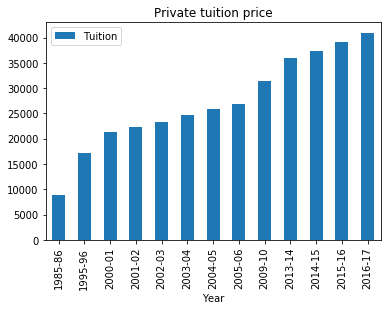

In [5]:
private = pd.DataFrame({
    'Tuition': private_colleges.tuition_cost.tolist(),
    'Year': private_colleges.year.tolist(),
})

private.plot(kind='bar', x='Year', y='Tuition')
plt.title('Private tuition price')

Text(0.5, 1.0, 'Public tuition price')

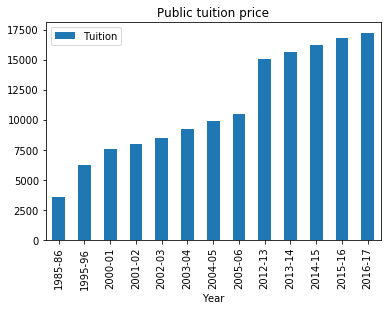

In [6]:
public_colleges = all_colleges[all_colleges.type=='Public']
public_colleges = public_colleges[['year', 'tuition_cost']]
public_colleges

public = pd.DataFrame({
    'Tuition': public_colleges.tuition_cost.tolist(),
    'Year': public_colleges.year.tolist(),
})

public.plot(kind='bar', x='Year', y='Tuition')
plt.title('Public tuition price')

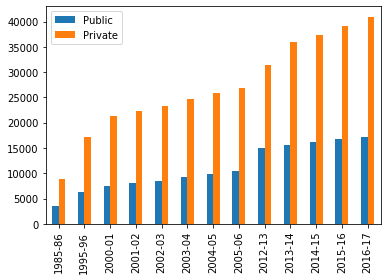

In [7]:
public_private = pd.DataFrame({
        'Public': public_colleges.tuition_cost.tolist(),
        'Private': private_colleges.tuition_cost.tolist()
    },
    index=public_colleges.year.tolist()
)
public_private.plot(kind='bar')